<a href="https://colab.research.google.com/github/alexandrosshomper/template/blob/main/Dealer_Suite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Create Retention Graphs

##Init

###Imports

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import files


In [ ]:
figure(num=None,figsize=(150,100),dpi=120,facecolor='w',edgecolor='k')

<Figure size 18000x12000 with 0 Axes>

<Figure size 18000x12000 with 0 Axes>

###Load CSV into Dataframe

In [ ]:
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv('Cohort Active Users Export - CSV Export.csv').fillna(0)
#df.head(7)

###Load Google Sheet into dataframe

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.auth import default
import gspread
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Cohort Active Users Export').sheet1
gsheet = worksheet.get_all_records()
print(gsheet)

[{'Cohorts': 'Febuary 22', 'Actor.Id': '00u35gu261YyC1Ira417', 'Count CustomerIDs': 4.0, '1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 0.0, '6': 0.0, '7': 1.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 1.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0, '32': 0.0, '33': 0.0, '34': 0.0, '35': 0.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 0.0, '42': 0.0, '43': 0.0, '44': 0.0, '45': 0.0, '46': 0.0, '47': 0.0, '48': 0.0, '49': 0.0, '50': 0.0, '51': 0.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.0}, {'Cohorts': 'Febuary 22', 'Actor.Id': '00u37x22jc7V2aMWF417', 'Count CustomerIDs': 1.0, '1': 1.0, '2': 1.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 1.0, '8': 0.0, '9': 0.0, '10': 0.0, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22'

In [ ]:
df = pd.DataFrame(gsheet)
df.fillna(130, inplace = True)

print(df.to_string())

          Cohorts              Actor.Id  Count CustomerIDs    1    2    3    4    5    6    7    8    9   10   11    12    13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55
0      Febuary 22  00u35gu261YyC1Ira417                4.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      Febuary 22  00u37x22jc7V2aMWF417                1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1

### Calculate Cohorts

In [ ]:
february_22_cohort = df[df['Cohorts'] == 'Febuary 22']
february_22_cohort.name = 'Febuary 22'
february_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
0,Febuary 22,00u35gu261YyC1Ira417,4.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Febuary 22,00u37x22jc7V2aMWF417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,Febuary 22,00u353y27jbNnSJ85417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
march_22_cohort = df[df['Cohorts'] == 'March 22']
march_22_cohort.name = 'March 22'
march_22_cohort


,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
3,March 22,00u3ce4zfvIE2OdgL417,61.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,March 22,00u3czjq1hzcAEkEL417,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,March 22,00u3d6fff7XGAIzlO417,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,March 22,00u3d6iuwxMFeop5P417,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,March 22,00u3e196xkP79JZ25417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,March 22,00u3eav2r0cujfPlz417,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
9,March 22,00u3eb3zfyQBlim5Q417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,March 22,00u3eb698mU7wPPX1417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,March 22,00u3ee2h1erJcdVEg417,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,March 22,00u3emps7vQhS4SfB417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
april_22_cohort = df[df['Cohorts'] == 'April 22']
april_22_cohort.name = 'April 22'
april_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
15,April 22,00u3iotlmorpPj47H417,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,April 22,00u3ixddyuFeUqM2J417,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,April 22,00u3iz682knJ0jlyd417,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,April 22,00u3j6umnsZS11fF1417,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19,April 22,00u3j87028ikI1AZo417,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,April 22,00u3jilqt6GNJ3u8s417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,April 22,00u3jrv7nhiXGmyNU417,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,April 22,00u3lsxk73kRlk1Sq417,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,April 22,00u3lxf040NQToh4f417,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,April 22,00u3mmo6s981U2o2Y417,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
may_22_cohort = df[df['Cohorts'] == 'May 22']
may_22_cohort.name = 'May 22'
may_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
33,May 22,00u3ty5py6PklpLYX417,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,May 22,00u3viuyhoWrGQoU0417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,May 22,00u3w5ojppKqSop2R417,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,May 22,00u3w6ebu8IMnjDa2417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,May 22,00u3wm09vm11NOCQX417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,May 22,00u3wnu5rddwD9Y6h417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,May 22,00u3xf2g49THPlch7417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,May 22,00u3xf8mdcsz7FDTK417,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,May 22,00u3xfteeyrr4rMz4417,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,May 22,00u3xhaa4vd6Q5Vdk417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
june_22_cohort = df[df['Cohorts'] == 'June 22']
june_22_cohort.name = 'June 22'
june_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
70,June 22,00u3j9rfgv3aZ13db417,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,June 22,00u4a4q4phevhe8cV417,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,June 22,00u4d3f80cPiZnVEd417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,June 22,00u4f0qj7tkTcXg4c417,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,June 22,00u4f1akfa2nAbuat417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,June 22,00u4f2g2fiGQnBWTX417,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,June 22,00u4f2kdk3Sup6mPt417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,June 22,00u4f10uo0inAkG25417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,June 22,00u4fa9hsxty0oS3K417,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,June 22,00u4fbg419vkwAOvF417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
august_22_cohort = df[df['Cohorts'] == 'August 22']
august_22_cohort.name = 'August 22'
august_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
105,August 22,00u4ulhv4bbb1mdf9417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,August 22,00u4ulrjkeMUfANYt417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,August 22,00u4vfwk7217BWLcA417,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,August 22,00u4vm2f1fyG4cffo417,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,August 22,00u4vm3ysonZTGYcs417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,August 22,00u4vm5wapcROXl0A417,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,August 22,00u4vwd3fthxjwGfY417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,August 22,00u4vwqxapjdlTi9V417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,August 22,00u4vz0svgBMsITjt417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,August 22,00u4w7qd8gaDOZIx4417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
september_22_cohort = df[df['Cohorts'] == 'September 22']
september_22_cohort.name = 'September 22'
september_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
117,September 22,00u51x29i8PkM2twm417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,September 22,00u52fvn53XsfKzFa417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,September 22,00u52wvs4ynY0nnKu417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,September 22,00u53aytitOAI0a9K417,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,September 22,00u53b85o7ESOdpiM417,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,September 22,00u54u2m7ebn9gy8e417,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,September 22,00u54v9lgw91d8qvN417,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,September 22,00u56wzq1g4K5J3x0417,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,September 22,00u506zcmiKjy3Wi2417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,September 22,00u530c237w6z0nyJ417,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
october_22_cohort = df[df['Cohorts'] == 'October 22']
october_22_cohort.name = 'October 22'
october_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
130,October 22,00u5bw92a6daPjeZw417,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,October 22,00u5bzptqyh7S3GIZ417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,October 22,00u5e4dg07FySe44u417,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,October 22,00u5fw4egucKcFdb5417,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,October 22,00u5fw658fxs5LNKN417,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,October 22,00u5fxoexqduu7s17417,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,October 22,00u5fz289vWZkxcAx417,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,October 22,00u5fzpfjwHE4zFeP417,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,October 22,00u5g1jkrmk3xjRWp417,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,October 22,00u5gboi8tLD7VRBL417,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
november_22_cohort = df[df['Cohorts'] == 'November 22']
november_22_cohort.name = 'November 22'
november_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
142,November 22,00u5f5lpyzrkzKcn1417,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,November 22,00u5fwd7uv9mf6fEd417,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,November 22,00u5fxabn8UzRb6fy417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,November 22,00u5fz7g0qOeVsnzz417,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,November 22,00u5fz64uxjpTQGZG417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,November 22,00u5q54k6lr8Y7X7b417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,November 22,00u5q63tcxrhkRBs5417,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,November 22,00u5qf9t7wezWUpy1417,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,November 22,00u5qfjnwj8aiFB8Y417,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
december_22_cohort = df[df['Cohorts'] == 'December 22']
december_22_cohort.name = 'December 22'
december_22_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
223,December 22,00u5g1wgrnnSjVJla417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,December 22,00u5r7mka0IAWyWxZ417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,December 22,00u5r97av2SZ54YaU417,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,December 22,00u5rauvoysCnq6qz417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,December 22,00u5rcijnzdQaEeEO417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,December 22,00u5rlbeyb17OwAMS417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,December 22,00u5rpcxj6MhzV0T0417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,December 22,00u5sbwbxrrgEg7hY417,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,December 22,00u5schm9e7nqjs1T417,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,December 22,00u5sgjvni98dk6Ly417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
january_23_cohort = df[df['Cohorts'] == 'January 23']
january_23_cohort.name = 'January 23'
january_23_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
250,January 23,00u6arqwinQHOSGlM417,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,January 23,00u6aswafv0UcZ9Z2417,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,January 23,00u60xryvnts9os5E417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,January 23,00u61q44oprzyzHph417,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,January 23,00u61wqjwc1iEQg7C417,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,January 23,00u61wr3fo4ge197a417,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,January 23,00u61wvdlwBD2lfhb417,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,January 23,00u61x7ky8bof76LH417,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,January 23,00u61xadhmd4Gcs0I417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,January 23,00u61xcgqw8zSFx4y417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
february_23_cohort = df[df['Cohorts'] == 'Februay 2023']
february_23_cohort.name = 'Februay 2023'
february_23_cohort

,Cohorts,Actor.Id,Count CustomerIDs,1,2,3,4,5,6,7,...,46,47,48,49,50,51,52,53,54,55
309,Februay 2023,00u6b6gueaSyOTRUg417,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,Februay 2023,00u6b91oj6ogX5dU6417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,Februay 2023,00u6baovb8eECamvU417,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,Februay 2023,00u6c6m1vg12mhNxD417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,Februay 2023,00u6cvgf84JCeu4E4417,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,Februay 2023,00u6dth06ixwvMgrD417,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,Februay 2023,00u6dz086pF7AZ8LT417,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,Februay 2023,00u6f2std0jC300un417,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,Februay 2023,00u6f4tcdl8cZklea417,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,Februay 2023,00u6f7ozwfyKK4KQC417,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Calculate Retention

In [ ]:
def get_retention(dataframe,start:int,end:int): return dataframe.iloc[:,start:end].sum(axis=0).div(len(dataframe.index))
ret=get_retention(df,3,55)
ret

1     0.970845
2     0.390671
3     0.244898
4     0.209913
5     0.189504
6     0.212828
7     0.209913
8     0.160350
9     0.157434
10    0.139942
11    0.134111
12    0.169096
13    0.148688
14    0.163265
15    0.102041
16    0.107872
17    0.113703
18    0.107872
19    0.116618
20    0.090379
21    0.075802
22    0.078717
23    0.067055
24    0.058309
25    0.064140
26    0.055394
27    0.061224
28    0.061224
29    0.049563
30    0.055394
31    0.049563
32    0.037901
33    0.064140
34    0.064140
35    0.049563
36    0.046647
37    0.037901
38    0.026239
39    0.029155
40    0.040816
41    0.029155
42    0.029155
43    0.023324
44    0.014577
45    0.020408
46    0.023324
47    0.020408
48    0.020408
49    0.008746
50    0.008746
51    0.011662
52    0.005831
dtype: float64

##Plot Retention Curves

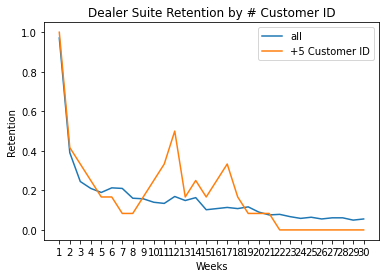

In [ ]:
plt.title("Dealer Suite Retention by # Customer ID")
plt.plot(get_retention(df,3,33).index, get_retention(df,3,33).values, label="all")
#Add Segment of Dataframe by Users that have >= 2 Customer IDs
plt.plot(get_retention(df[df['Count CustomerIDs'] >= 5],3,33).index, get_retention(df[df['Count CustomerIDs'] >= 5],3,33).values, label="+5 Customer ID")

plt.xlabel("Weeks")
plt.ylabel("Retention")
plt.legend()
plt.show()

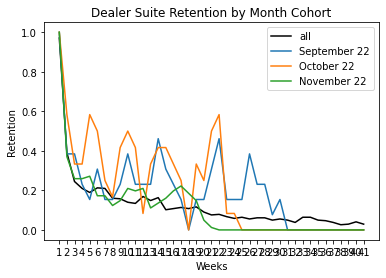

In [ ]:
plt.title("Dealer Suite Retention by Month Cohort")
plt.plot(get_retention(df,3,44).index, get_retention(df,3,44).values, color='black', label="all")

plt.plot(get_retention(september_22_cohort,3,44).index, get_retention(september_22_cohort,3,44).values, label="September 22")
plt.plot(get_retention(october_22_cohort,3,44).index, get_retention(october_22_cohort,3,44).values, label="October 22")
plt.plot(get_retention(november_22_cohort,3,44).index, get_retention(november_22_cohort,3,44).values, label="November 22")

plt.xlabel("Weeks")
plt.ylabel("Retention")
plt.legend()
plt.show()

In [ ]:
november_22_cohort.shape

(81, 58)

In [ ]:
september_22_cohort.shape

(13, 58)

In [ ]:
october_22_cohort.shape

(12, 58)

##Build Cohort Charts

In [ ]:
cohorts = pd.DataFrame([
    get_retention(february_22_cohort,3,58),
    get_retention(march_22_cohort,3,58),
    get_retention(april_22_cohort,3,58),
    get_retention(may_22_cohort,3,58),
    get_retention(june_22_cohort,3,58),
    get_retention(august_22_cohort,3,58),
    get_retention(september_22_cohort,3,58),
    get_retention(october_22_cohort,3,58),
    get_retention(november_22_cohort,3,58),
    get_retention(december_22_cohort,3,58),
    get_retention(january_23_cohort,3,58),
    get_retention(february_23_cohort,3,58),
    ], [
    february_22_cohort.name, 
    march_22_cohort.name,
    april_22_cohort.name,
    may_22_cohort.name,
    june_22_cohort.name,
    august_22_cohort.name,
    september_22_cohort.name,
    october_22_cohort.name, 
    november_22_cohort.name,
    december_22_cohort.name,
    january_23_cohort.name,
    february_23_cohort.name
    ])
cohorts

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
Febuary 22,1.000000,0.666667,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.333333,0.666667,0.333333,0.000000,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333
March 22,1.000000,0.583333,0.250000,0.250000,0.250000,0.333333,0.250000,0.416667,0.333333,0.166667,...,0.083333,0.083333,0.250000,0.166667,0.166667,0.166667,0.083333,0.000000,0.000000,0.000000
April 22,1.000000,0.388889,0.500000,0.555556,0.277778,0.388889,0.444444,0.222222,0.222222,0.388889,...,0.333333,0.222222,0.166667,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May 22,1.000000,0.351351,0.243243,0.270270,0.243243,0.216216,0.189189,0.108108,0.054054,0.054054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
June 22,0.714286,0.314286,0.142857,0.142857,0.085714,0.114286,0.257143,0.285714,0.228571,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
August 22,1.000000,0.416667,0.083333,0.250000,0.083333,0.250000,0.083333,0.083333,0.333333,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
September 22,1.000000,0.384615,0.384615,0.230769,0.153846,0.307692,0.153846,0.153846,0.230769,0.384615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
October 22,1.000000,0.583333,0.333333,0.333333,0.583333,0.500000,0.250000,0.166667,0.416667,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
November 22,1.000000,0.370370,0.259259,0.259259,0.271605,0.172840,0.172840,0.123457,0.148148,0.209877,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
December 22,1.000000,0.370370,0.148148,0.111111,0.074074,0.296296,0.259259,0.296296,0.222222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Cohort Function
1. Read Cohort Values
2. For each value create retention dataframe with the value as dataframe name
3. Create cohorts data frame
4. For each values dataframe add a row into the Cohorts dataframe

In [ ]:
#Read Cohort Values from df
cohort_values = pd.Series(df['Cohorts'].drop_duplicates().reset_index(drop=True))

In [ ]:
cohort_values

0       Febuary 22
1         March 22
2         April 22
3           May 22
4          June 22
5        August 22
6     September 22
7       October 22
8      November 22
9      December 22
10      January 23
11    Februay 2023
Name: Cohorts, dtype: object

In [ ]:
for el in cohort_values.array: print(el)

Febuary 22
March 22
April 22
May 22
June 22
August 22
September 22
October 22
November 22
December 22
January 23
Februay 2023


In [ ]:
def get_cohorts(dataframe,start:int,end:int): 
  global retention_cohorts
  global cohort_values
  for cv in cohort_values.values:  
    new_ret = get_retention(df[df['Cohorts'] == cv],3,58)
    retention_cohorts
  return dataframe.iloc[:,start:end].sum(axis=0).div(len(dataframe.index))
  # return series, then add to new dataframe

In [ ]:
retention_cohorts = pd.DataFrame(get_cohorts, cohort_values)
retention_cohorts

""


In [ ]:
 for cv in cohort_values.values:  
    new_ret = get_retention(df[df['Cohorts'] == cv],3,58)
    print (new_ret)

1     1.000000
2     0.666667
3     0.333333
4     0.333333
5     0.000000
6     0.000000
7     1.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.333333
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.333333
30    0.333333
31    0.000000
32    0.333333
33    0.333333
34    0.333333
35    0.333333
36    0.000000
37    0.333333
38    0.333333
39    0.000000
40    0.333333
41    0.000000
42    0.333333
43    0.333333
44    0.333333
45    0.333333
46    0.333333
47    0.666667
48    0.333333
49    0.000000
50    0.333333
51    0.666667
52    0.333333
53    0.333333
54    0.666667
55    0.333333
dtype: float64
1     1.000000
2     0.583333
3     0.250000
4     0.250000
5     0.250000
6     0.333333
7     0.250000
8     0.416667
9     0.333333
10    0.166667
11    0.25

###Plot Cohort Chart

<Axes: >

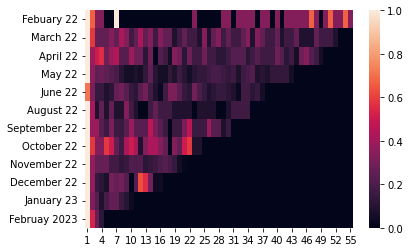

In [ ]:
#sns.heatmap(cohorts, annot=True)
sns.heatmap(cohorts)

In [ ]:
cohorts["New Users"]= [
    february_22_cohort.shape[0], 
    march_22_cohort.shape[0],
    april_22_cohort.shape[0],
    may_22_cohort.shape[0],
    june_22_cohort.shape[0],
    august_22_cohort.shape[0],
    september_22_cohort.shape[0],
    october_22_cohort.shape[0], 
    november_22_cohort.shape[0],
    december_22_cohort.shape[0],
    january_23_cohort.shape[0],
    february_23_cohort.shape[0]
]
column_to_move = cohorts.pop("New Users")

# insert column with insert(location, column_name, column_value)

cohorts.insert(0, "New Users", column_to_move)
cohorts

,New Users,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
Febuary 22,3,1.000000,0.666667,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.333333,0.666667,0.333333,0.000000,0.333333,0.666667,0.333333,0.333333,0.666667,0.333333
March 22,12,1.000000,0.583333,0.250000,0.250000,0.250000,0.333333,0.250000,0.416667,0.333333,...,0.083333,0.083333,0.250000,0.166667,0.166667,0.166667,0.083333,0.000000,0.000000,0.000000
April 22,18,1.000000,0.388889,0.500000,0.555556,0.277778,0.388889,0.444444,0.222222,0.222222,...,0.333333,0.222222,0.166667,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May 22,37,1.000000,0.351351,0.243243,0.270270,0.243243,0.216216,0.189189,0.108108,0.054054,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
June 22,35,0.714286,0.314286,0.142857,0.142857,0.085714,0.114286,0.257143,0.285714,0.228571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
August 22,12,1.000000,0.416667,0.083333,0.250000,0.083333,0.250000,0.083333,0.083333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
September 22,13,1.000000,0.384615,0.384615,0.230769,0.153846,0.307692,0.153846,0.153846,0.230769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
October 22,12,1.000000,0.583333,0.333333,0.333333,0.583333,0.500000,0.250000,0.166667,0.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
November 22,81,1.000000,0.370370,0.259259,0.259259,0.271605,0.172840,0.172840,0.123457,0.148148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
December 22,27,1.000000,0.370370,0.148148,0.111111,0.074074,0.296296,0.259259,0.296296,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
